In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [4]:
#To understand the correlation
#by values
cars.corr()


,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


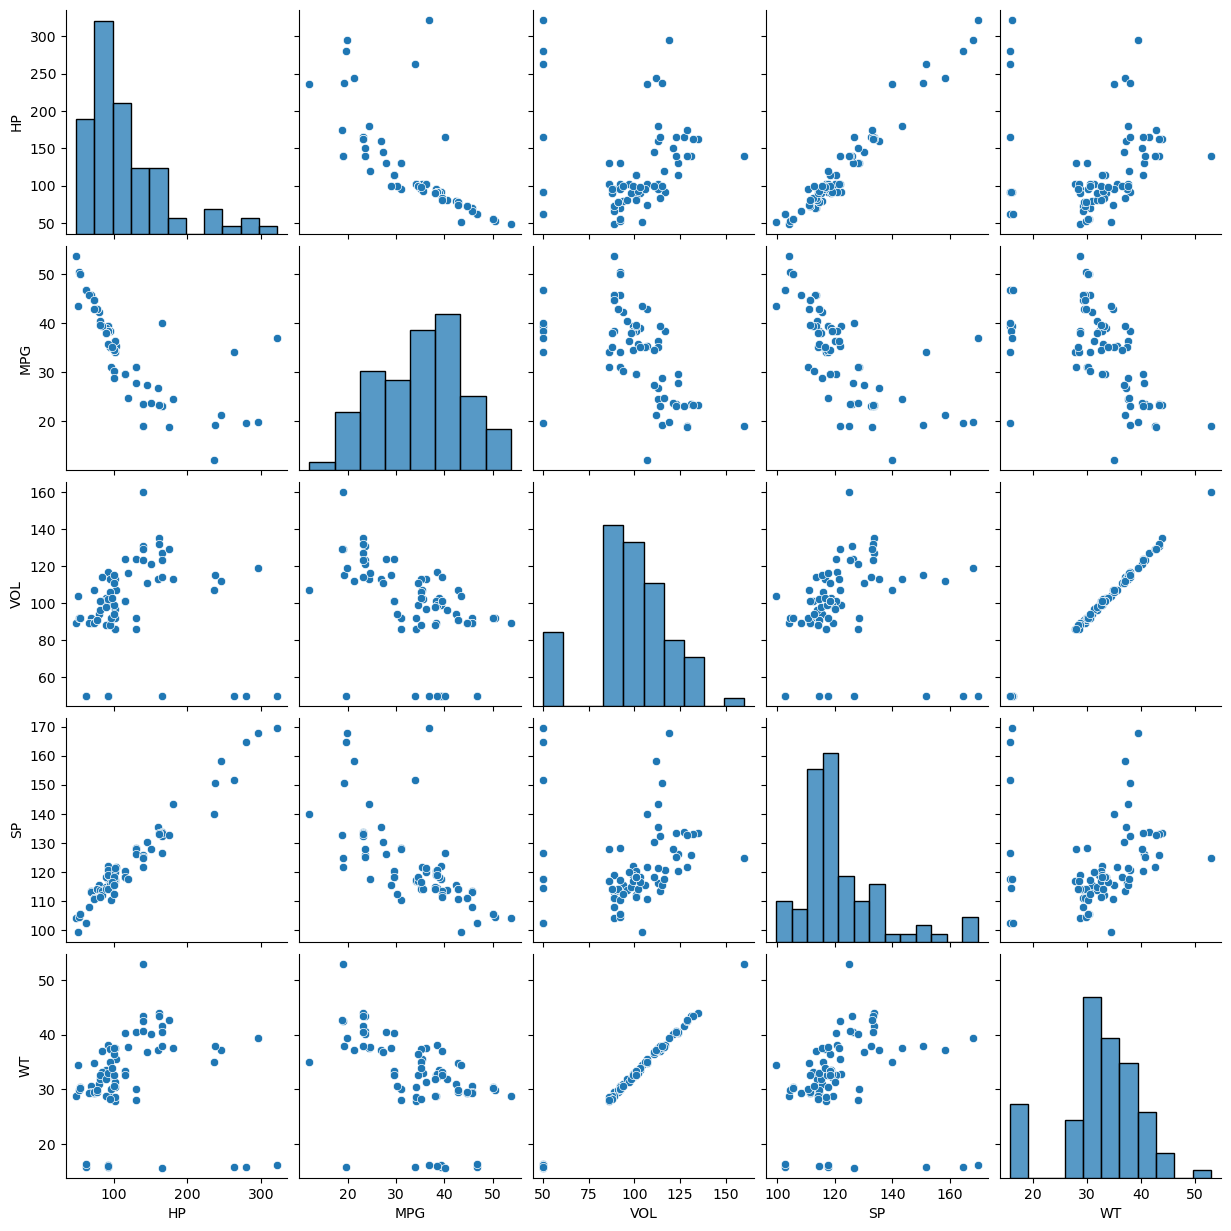

In [7]:
#by plots
sns.pairplot(cars)

In [ ]:
#inference:1.VOL and WT has max correlation with 99%
#2.HP and SP has correlation of 97%

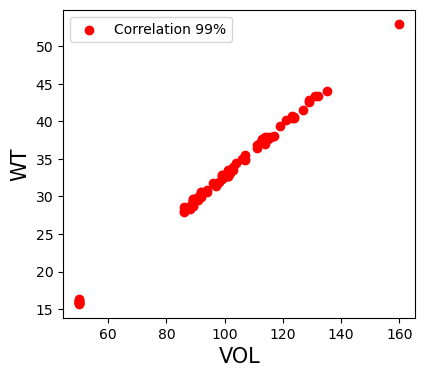

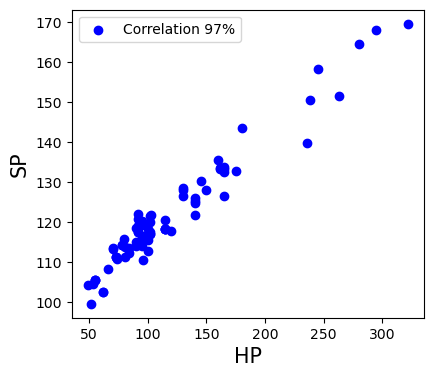

In [12]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(cars["VOL"],cars["WT"],color = "red",label= "Correlation 99%")
plt.xlabel("VOL",size = 15)
plt.ylabel("WT",size = 15)
plt.legend(loc= "best")


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(cars["HP"],cars["SP"],color = "blue",label= "Correlation 97%")
plt.xlabel("HP",size=15)
plt.ylabel("SP",size=15)
plt.legend(loc="best")

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [16]:
#check for null values
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

# Correlation Matrix

In [17]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [53]:
#multicollinearity is failing

# Preparing a model

In [18]:
#Build model
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [19]:
model.rsquared

0.7705372737359842

In [20]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.54e-23
Time:                        16:27:46   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [22]:
#t and p values 
#print(model.tvalues,'\n',model.pvalues)

In [23]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

# Calculating VIF

In [27]:
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp) 

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_sp = smf.ols('SP~VOL+WT+HP',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)

#Storing vif variables in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)
Vif_frame


,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [28]:
#high VIF is problematic. Threshold is 20
#WT,VOL,SP is problematic

# Teatment for multicollinearity

In [45]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~VOL+HP',data=cars).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     117.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           2.98e-24
Time:                        17:26:01   Log-Likelihood:                -237.33
No. Observations:                  81   AIC:                             480.7
Df Residuals:                      78   BIC:                             487.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5864      2.506     26.574      0.000      61.598      71.575
VOL           -0.1948      0.023     -8.389      0.000      -0.241      -0.149
HP            -0.1100      0.009    -12.135      0.000      -0.128      -0.092
==============================================================================
Omnibus:                        4.802   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.006
Skew:                           0.482   Prob(JB):                        0.135
Kurtosis:                       3.506   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
model1 = smf.ols('MPG~WT+HP',data=cars).fit()

In [35]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     116.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           3.81e-24
Time:                        17:27:33   Log-Likelihood:                -237.58
No. Observations:                  81   AIC:                             481.2
Df Residuals:                      78   BIC:                             488.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.0838      2.467     26.784      0.000      61.172      70.996
WT            -0.5777      0.069     -8.334      0.000      -0.716      -0.440
HP            -0.1101      0.009    -12.109      0.000      -0.128      -0.092
==============================================================================
Omnibus:                        4.895   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.086   Jarque-Bera (JB):                4.101
Skew:                           0.485   Prob(JB):                        0.129
Kurtosis:                       3.522   Cond. No.                         642.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model3 = smf.ols('MPG~SP+HP',data= cars).fit()

In [37]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     44.45
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.31e-13
Time:                        17:28:22   Log-Likelihood:                -262.77
No. Observations:                  81   AIC:                             531.5
Df Residuals:                      78   BIC:                             538.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0209     20.495      1.270      0.208     -14.782      66.824
SP             0.2364      0.219      1.078      0.285      -0.200       0.673
HP            -0.1731      0.054     -3.178      0.002      -0.282      -0.065
==============================================================================
Omnibus:                       27.260   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.523
Skew:                           1.214   Prob(JB):                     1.45e-12
Kurtosis:                       6.204   Cond. No.                     5.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
#going with hp and vol

# Test for Normality of Residuals (Q-Q Plot)

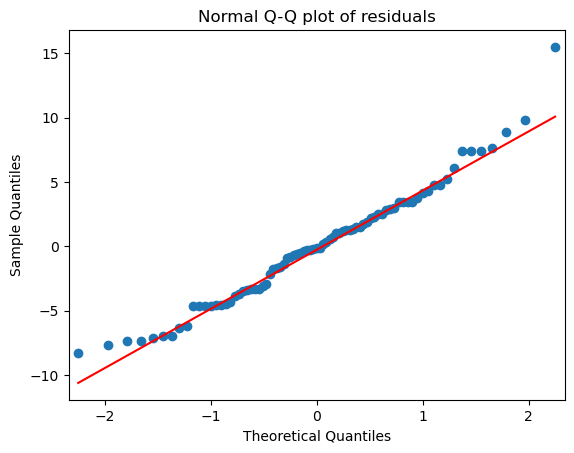

In [40]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') #line 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [41]:
#Errors are coming from normal distribution

# Residual plot for Homoscedasticity

In [46]:
def get_standardised_values( vals ):
    return (vals - vals.mean())/vals.std()

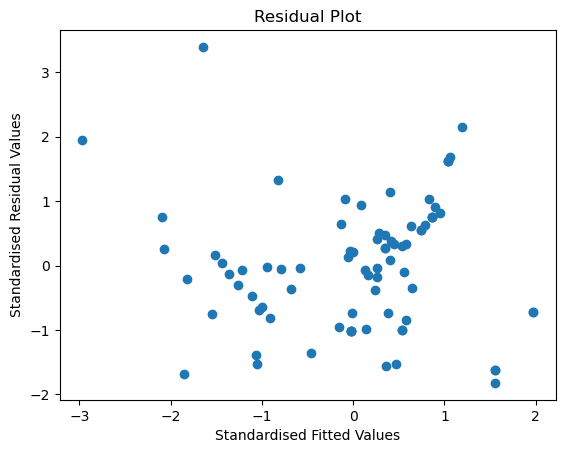

In [47]:
plt.scatter(get_standardised_values(model.fittedvalues),
           get_standardised_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardised Fitted Values')
plt.ylabel('Standardised Residual Values')
plt.show()

In [48]:
#errors are coming from same variance HOMOSCEDASTICITY

# Residual vs Regressors(features)

eval_env: 1


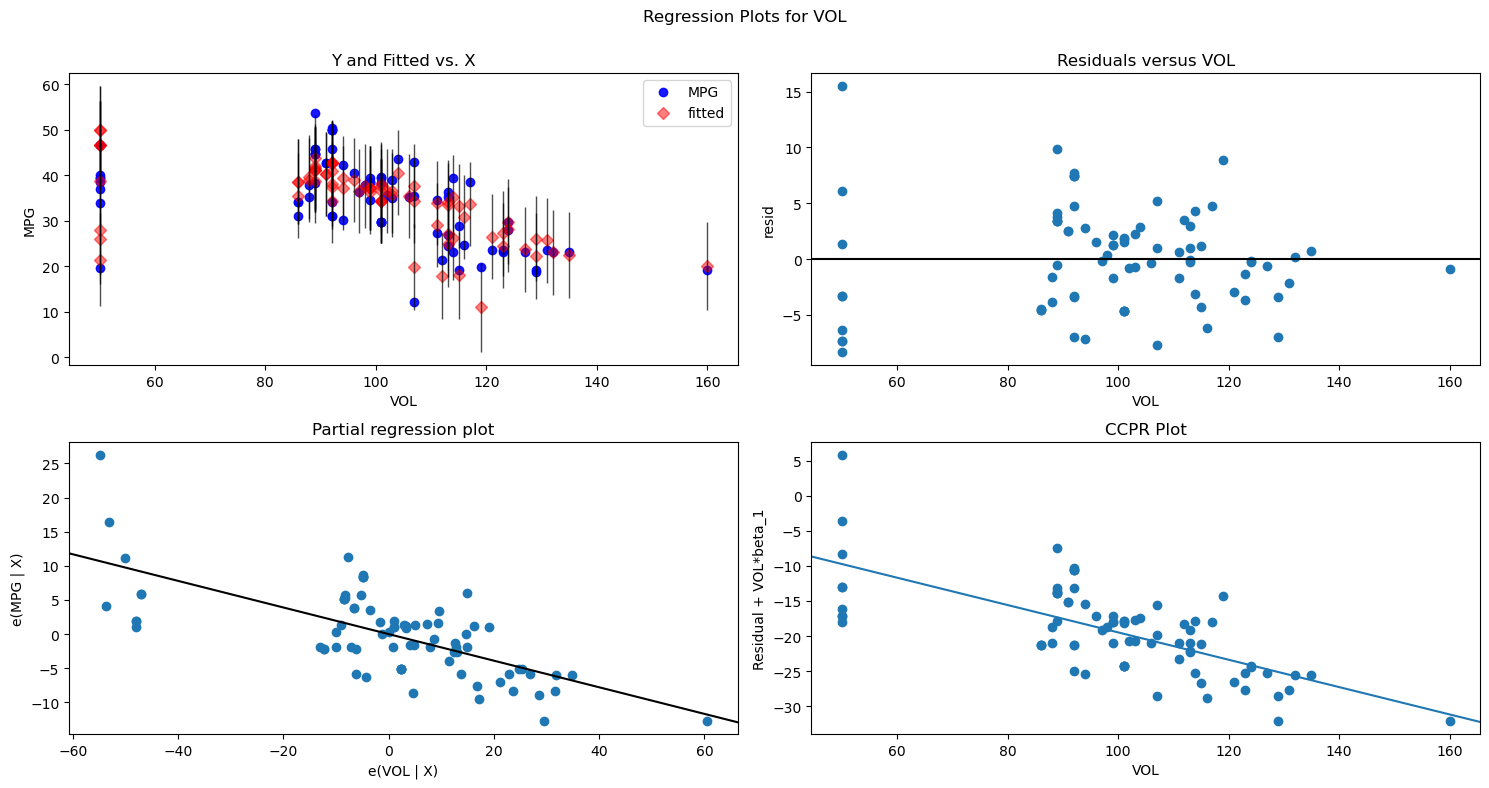

In [50]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "VOL", fig=fig)
plt.show()

eval_env: 1


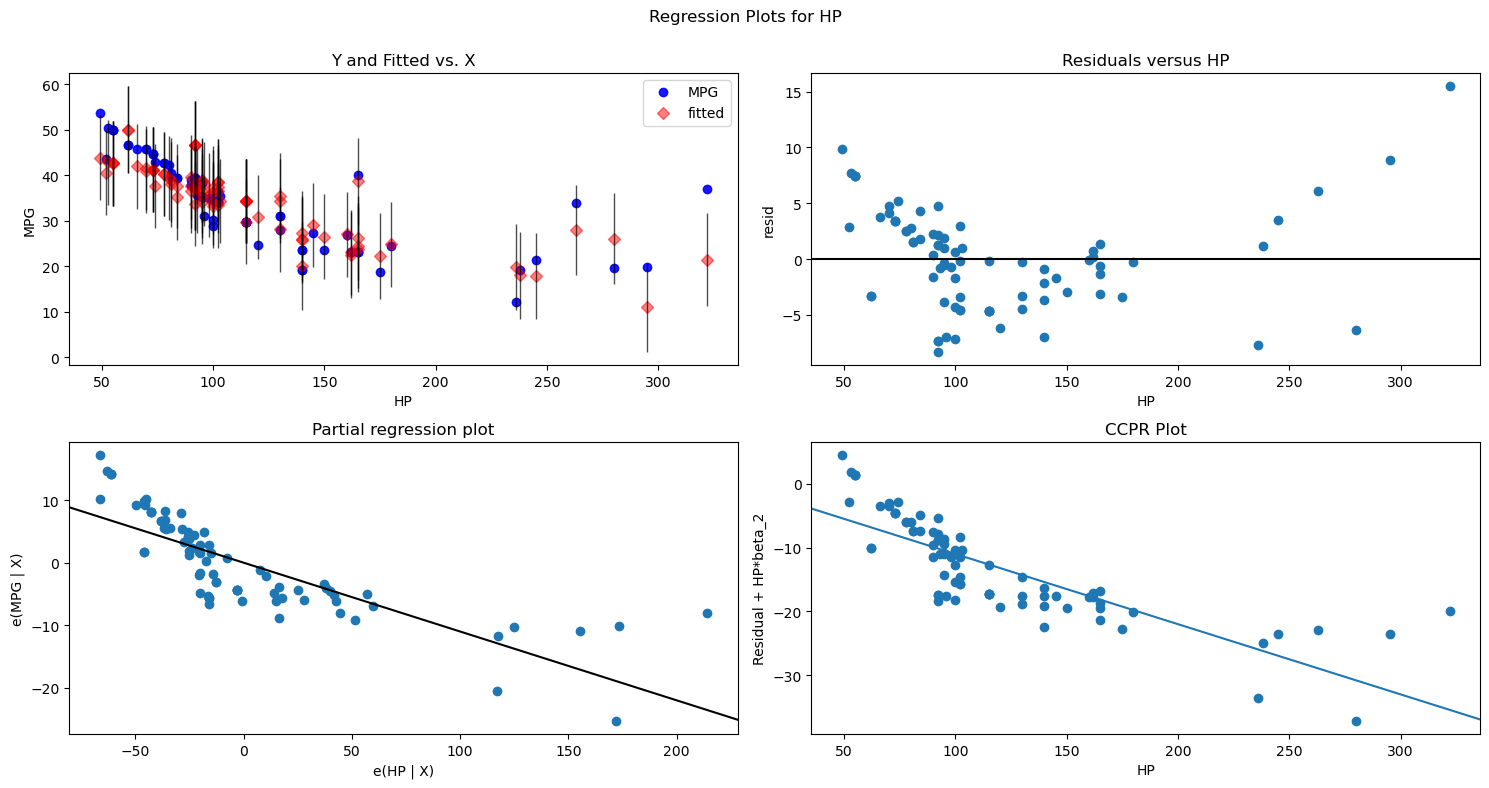

In [51]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Detecting Outliers/Influencers

# Cook's Distance

In [52]:
model_influence = model.get_influence()
(c, _)= model_influence.cooks_distance #it gives cook's distance and p value but not interested in p value

In [55]:
K=2
N=81
3*(K+1)/N
#k is the number of 
#n is the number of rows
#0.111 is the threshold. above which it is an outlier

0.1111111111111111

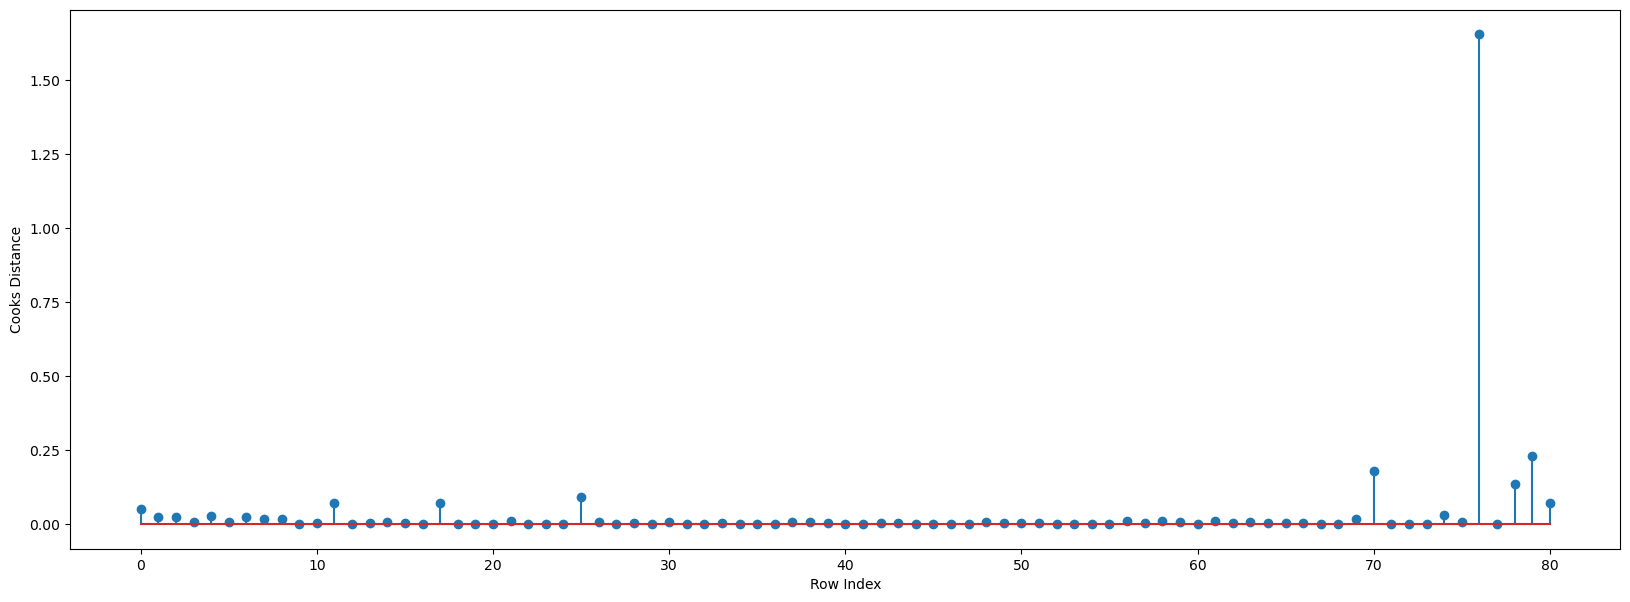

In [57]:
#Plot the influencers values using stem plot
fig = plt.figure(figsize = (20,7))
plt.stem(np.arange(len(cars)),np.round(c,3)) #round it to 3 decimals
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [69]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c)) #76 is the index number and 1.

(76, 1.654414731457555)

In [59]:
np.where(c>0.1111) #outliers

(array([70, 76, 78, 79], dtype=int64),)

In [60]:
#cooks distance lower the better

# Improving the model

In [62]:
#load the data
cars_new = pd.read_csv("Cars.csv")

In [63]:
#Discard the data points which are influencers and reassign the row number
cars1 = cars_new.drop(cars_new.index[[70,76,78,79]],axis = 0).reset_index()

In [64]:
#Drop the original index
cars1=cars1.drop(['index'],axis=1)

In [65]:
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


# Build Model

In [66]:
#Exclude variable "WT" and generate R-squared and AIC values
final_ml_V = smf.ols('MPG~HP+VOL',data = cars1).fit()

In [67]:
(final_ml_V.rsquared,final_ml_V.aic) #model went from 0.751 to 0.843

(0.8438644043815174, 419.7431711665409)

In [68]:
final_ml_V.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     200.0
Date:                Tue, 31 Jan 2023   Prob (F-statistic):           1.44e-30
Time:                        18:27:30   Log-Likelihood:                -206.87
No. Observations:                  77   AIC:                             419.7
Df Residuals:                      74   BIC:                             426.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     65.0632      2.080     31.287      0.000      60.920      69.207
HP            -0.1613      0.011    -14.422      0.000      -0.184      -0.139
VOL           -0.1273      0.023     -5.567      0.000      -0.173      -0.082
==============================================================================
Omnibus:                        1.784   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.410   Jarque-Bera (JB):                1.357
Skew:                           0.322   Prob(JB):                        0.507
Kurtosis:                       3.097   Cond. No.                         770.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""